# Library Imports

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sborn
%matplotlib inline
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR

# Loading the Data

In [61]:
df = pd.read_csv("/content/drive/MyDrive/AirQualityUCI/AirQualityUCI.csv", sep = ";")
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

# Data Preprocessing

In [63]:
# remove the last two columns
# which are empty
df.drop(labels = ["Unnamed: 15", "Unnamed: 16"], axis=1, inplace=True)

In [64]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# drop the empty rows at the bottom
df.dropna(inplace = True)

In [66]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [67]:
# converting non numeric columns with , values to float columns
columnsToChange = ["CO(GT)", "C6H6(GT)", "T", "RH", "AH"]
for c in columnsToChange:
  df[c] = df[c].str.replace(",", ".").astype(float)

In [68]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [69]:
# correcting missing values
# right now -200 appears at each missing value
# replacing it with previous value in the column
for c in df.columns:
    for r in range(0, len(df)):
       if df[c][r] == -200:
           df[c][r] = df[c][r - 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [70]:
# dropping data and time columns
# knowing that the data is an uninterrupted time series
df.drop(labels = ["Date", "Time"], axis = 1, inplace = True)
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,275.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,275.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,275.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,275.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


# Descriptive Statistics

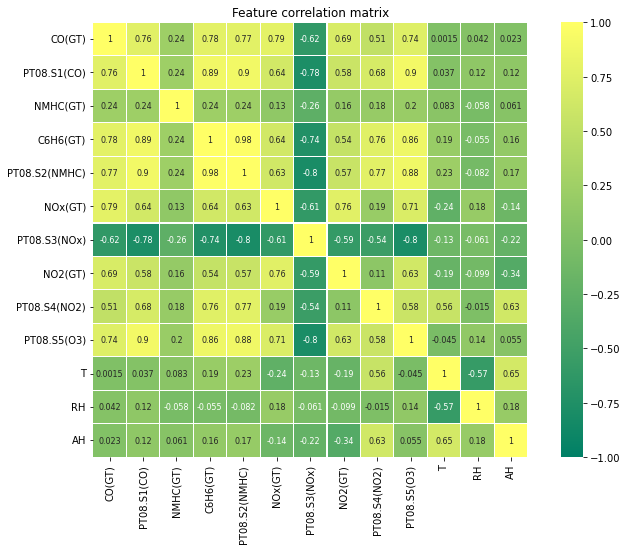

In [71]:
# plotting correlation matrix
# to investigate how features vary with each other
correlations = df.corr()
plt.figure(figsize=(12, 8))
axes = plt.axes()
axes.set_title("Feature correlation matrix")
sborn.heatmap(correlations, cmap='summer', vmax=1.0, vmin=-1.0, 
              linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True)

In [72]:
# mean of the features
df.mean(axis = 0)

CO(GT)              2.082195
PT08.S1(CO)      1102.730362
NMHC(GT)          270.496740
C6H6(GT)           10.190392
PT08.S2(NMHC)     942.548253
NOx(GT)           240.731217
PT08.S3(NOx)      832.742225
NO2(GT)           109.414877
PT08.S4(NO2)     1453.014535
PT08.S5(O3)      1030.511916
T                  18.317356
RH                 48.817431
AH                  1.017382
dtype: float64

In [73]:
# standard deviation of the features
df.std(axis = 0, ddof = 1)

CO(GT)             1.469801
PT08.S1(CO)      219.588101
NMHC(GT)          73.306853
C6H6(GT)           7.565771
PT08.S2(NMHC)    269.581368
NOx(GT)          206.618453
PT08.S3(NOx)     255.709423
NO2(GT)           47.221662
PT08.S4(NO2)     347.434084
PT08.S5(O3)      410.916759
T                  8.821883
RH                17.354326
AH                 0.404829
dtype: float64

In [74]:
# range of the features
print(df.min(axis = 0))
print("--To--")
print(df.max(axis = 0))

CO(GT)             0.1000
PT08.S1(CO)      647.0000
NMHC(GT)           7.0000
C6H6(GT)           0.1000
PT08.S2(NMHC)    383.0000
NOx(GT)            2.0000
PT08.S3(NOx)     322.0000
NO2(GT)            2.0000
PT08.S4(NO2)     551.0000
PT08.S5(O3)      221.0000
T                 -1.9000
RH                 9.2000
AH                 0.1847
dtype: float64
--To--
CO(GT)             11.900
PT08.S1(CO)      2040.000
NMHC(GT)         1189.000
C6H6(GT)           63.700
PT08.S2(NMHC)    2214.000
NOx(GT)          1479.000
PT08.S3(NOx)     2683.000
NO2(GT)           340.000
PT08.S4(NO2)     2775.000
PT08.S5(O3)      2523.000
T                  44.600
RH                 88.700
AH                  2.231
dtype: float64


# Time Series Showing Trend?

In [75]:
# taking 12 features out of the 13 at a time
# for the Coint Johansen test
for c in df.columns:
  tempDf = df.drop(labels = [c], axis=1)
  print(coint_johansen(tempDf, -1, 1).eig)

[1.75510896e-01 1.52389933e-01 1.15120416e-01 1.04126281e-01
 9.29485509e-02 6.89397159e-02 5.77070988e-02 3.43554214e-02
 3.05980659e-02 1.18697142e-02 2.46766099e-03 7.09584856e-05]
[1.78733838e-01 1.52921486e-01 1.15244649e-01 1.01301868e-01
 9.21140102e-02 7.31283653e-02 6.12704268e-02 5.24958621e-02
 3.17926997e-02 1.18142994e-02 4.37232478e-03 6.91862030e-05]
[1.65896401e-01 1.48604277e-01 1.07247334e-01 9.54763764e-02
 7.37415729e-02 6.69039878e-02 5.85216931e-02 3.47413328e-02
 3.26315727e-02 1.25561717e-02 2.50090697e-03 7.21472864e-05]
[1.64913469e-01 1.23413193e-01 1.07252238e-01 9.93354058e-02
 7.47544809e-02 7.10765968e-02 5.97956189e-02 3.45370005e-02
 3.21541427e-02 1.35540559e-02 2.53588313e-03 1.22359368e-04]
[1.69564360e-01 1.22080230e-01 1.12930717e-01 9.71233892e-02
 7.94271860e-02 7.23460009e-02 5.84361228e-02 4.95913841e-02
 3.43119110e-02 1.24035569e-02 2.48683589e-03 1.17065853e-04]
[1.70749696e-01 1.52374313e-01 1.15212221e-01 1.06667729e-01
 7.68663265e-02 6.2

In [76]:
# creating the train and validation set
# in 80:20 ratio
trainLen = int(0.8 * len(df))
trainData = df[: trainLen]
valData = df[trainLen:]

In [77]:
trainData

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,1.0,841.0,275.0,2.6,625.0,172.0,1054.0,112.0,846.0,687.0,9.0,39.5,0.4554
7481,1.0,850.0,275.0,2.6,629.0,138.0,1076.0,96.0,847.0,597.0,10.7,34.4,0.4406
7482,0.8,831.0,275.0,2.2,602.0,121.0,1123.0,89.0,824.0,527.0,11.1,33.4,0.4401
7483,1.0,866.0,275.0,3.0,652.0,143.0,1060.0,98.0,857.0,573.0,11.9,30.8,0.4285


In [78]:
valData

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
7485,0.7,833.0,275.0,2.0,584.0,107.0,1144.0,80.0,821.0,463.0,11.3,32.5,0.4334
7486,1.1,877.0,275.0,2.8,642.0,176.0,1037.0,112.0,859.0,565.0,11.0,33.0,0.4331
7487,1.1,892.0,275.0,3.3,668.0,180.0,1017.0,121.0,872.0,632.0,10.3,35.0,0.4377
7488,1.2,899.0,275.0,3.4,674.0,212.0,1002.0,132.0,893.0,691.0,8.4,40.9,0.4542
7489,2.0,1008.0,275.0,7.1,861.0,331.0,839.0,160.0,977.0,943.0,8.3,38.5,0.4228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,275.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,275.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,275.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,275.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


# Vector Autoregression

In [79]:
# model definition
varModel = VAR(endog = trainData)

In [80]:
# finding the right lag order
x = varModel.select_order()
x.summary()

,AIC,BIC,FPE,HQIC
0,78.11,78.13,8.396e+33,78.12
1,53.09,53.26,1.137e+23,53.15
2,51.88,52.20,3.391e+22,51.99
3,51.71,52.19*,2.860e+22,51.87
4,51.60,52.24,2.576e+22,51.82
5,51.54,52.34,2.416e+22,51.81
6,51.47,52.42,2.249e+22,51.79
7,51.40,52.51,2.107e+22,51.78
8,51.34,52.60,1.970e+22,51.77
9,51.26,52.69,1.836e+22,51.75


In [81]:
# fitting the model to training data
varModel = varModel.fit(26)

In [82]:
varModel.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 04, Dec, 2021
Time:                     11:23:39
--------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                    54.4032
Nobs:                     7459.00    HQIC:                   51.7201
Log likelihood:          -320838.    FPE:                7.11939e+21
AIC:                      50.3163    Det(Omega_mle):     3.99492e+21
--------------------------------------------------------------------
Results for equation CO(GT)
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.018798         0.341642            0.055           0.956
L1.CO(GT)                 0.755247         0.022148           34.100           0.000
L1.PT08.S1(CO)            0.002144         

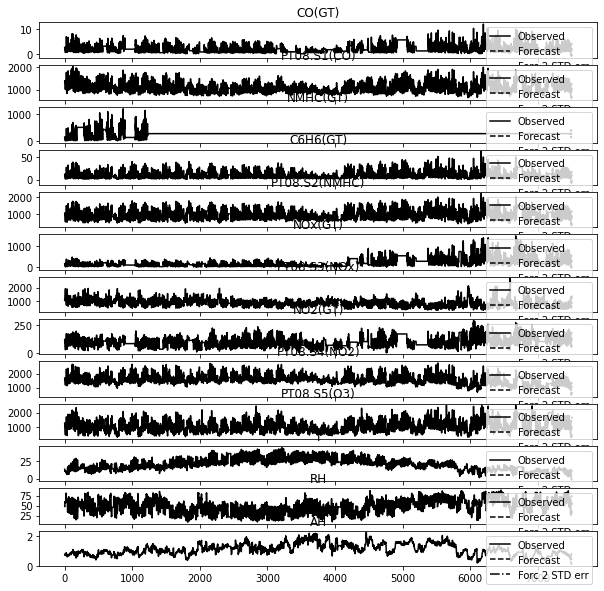

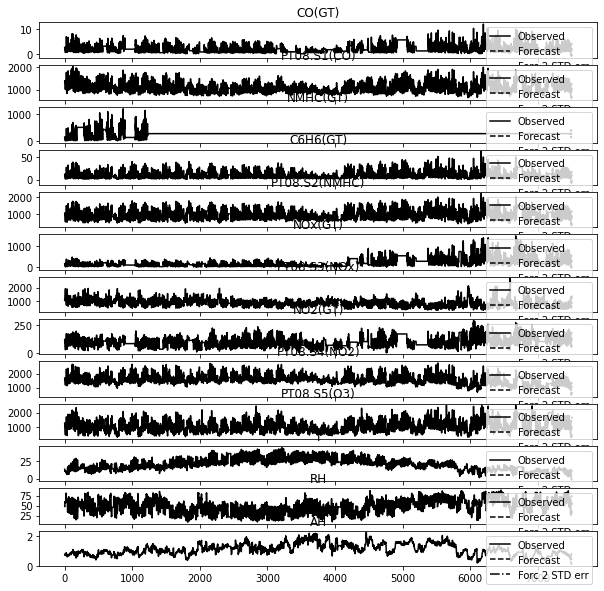

In [104]:
varModel.plot_forecast(20)

In [95]:
# forecasts corresponding to points in validation set
forecasts = varModel.forecast(varModel.y, steps = len(valData))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [84]:
print(forecasts.shape)
print(forecasts)

(1872, 13)
[[7.56452127e-01 8.33846640e+02 2.69389958e+02 ... 1.07777630e+01
  3.45622552e+01 4.39143582e-01]
 [9.68199478e-01 8.91923119e+02 2.80549130e+02 ... 1.05594504e+01
  3.62944547e+01 4.47481889e-01]
 [1.32191150e+00 9.32299969e+02 2.71140774e+02 ... 9.68320093e+00
  3.96992006e+01 4.42759012e-01]
 ...
 [2.30165591e+00 1.12796255e+03 2.71185023e+02 ... 1.77273103e+01
  5.25935703e+01 1.04836765e+00]
 [2.30161554e+00 1.12795379e+03 2.71186869e+02 ... 1.77293534e+01
  5.25907439e+01 1.04842675e+00]
 [2.30155504e+00 1.12794140e+03 2.71188246e+02 ... 1.77312514e+01
  5.25882794e+01 1.04848675e+00]]


In [85]:
# dataframe of forecasts
forecastData = pd.DataFrame(data = forecasts, columns = valData.columns)
forecastData

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.756452,833.846640,269.389958,1.696029,582.744175,119.995690,1124.042837,88.789808,803.002949,516.488241,10.777763,34.562255,0.439144
1,0.968199,891.923119,280.549130,2.667972,638.495218,179.579164,1068.958404,98.474092,841.026525,624.647801,10.559450,36.294455,0.447482
2,1.321912,932.299969,271.140774,4.010884,697.401000,255.733230,1015.724362,113.643311,878.218019,715.250630,9.683201,39.699201,0.442759
3,1.570086,971.404912,262.600773,4.974452,743.044060,307.154041,960.670352,122.162614,922.642637,799.818200,8.894774,43.339296,0.448137
4,2.082974,1022.291542,263.494854,6.754319,811.366239,352.149265,902.510668,131.798004,982.369942,902.440745,8.068787,46.412895,0.455650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,2.301689,1127.971091,271.180165,11.145743,976.314368,281.174691,818.518469,107.681737,1476.736880,1096.965977,17.722886,52.600059,1.048252
1868,2.301679,1127.968077,271.182757,11.146076,976.329458,281.159914,818.506863,107.681415,1476.777938,1096.950411,17.725144,52.596701,1.048309
1869,2.301656,1127.962552,271.185023,11.146309,976.340817,281.143436,818.497607,107.680648,1476.815866,1096.931743,17.727310,52.593570,1.048368
1870,2.301616,1127.953792,271.186869,11.146417,976.347419,281.124940,818.491535,107.679265,1476.850051,1096.909196,17.729353,52.590744,1.048427


In [86]:
valDataCopy = valData.reset_index()
valDataCopy

,index,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,7485,0.7,833.0,275.0,2.0,584.0,107.0,1144.0,80.0,821.0,463.0,11.3,32.5,0.4334
1,7486,1.1,877.0,275.0,2.8,642.0,176.0,1037.0,112.0,859.0,565.0,11.0,33.0,0.4331
2,7487,1.1,892.0,275.0,3.3,668.0,180.0,1017.0,121.0,872.0,632.0,10.3,35.0,0.4377
3,7488,1.2,899.0,275.0,3.4,674.0,212.0,1002.0,132.0,893.0,691.0,8.4,40.9,0.4542
4,7489,2.0,1008.0,275.0,7.1,861.0,331.0,839.0,160.0,977.0,943.0,8.3,38.5,0.4228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,9352,3.1,1314.0,275.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
1868,9353,2.4,1163.0,275.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
1869,9354,2.4,1142.0,275.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
1870,9355,2.1,1003.0,275.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


CO(GT)


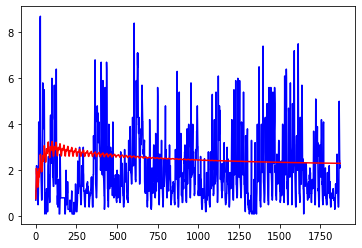




PT08.S1(CO)


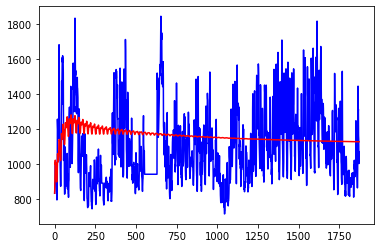




NMHC(GT)


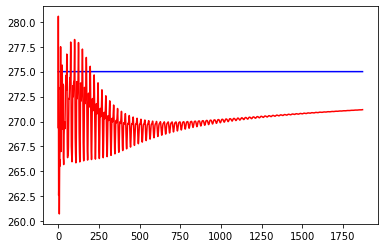




C6H6(GT)


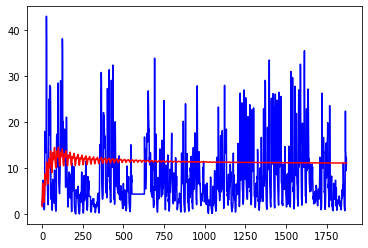




PT08.S2(NMHC)


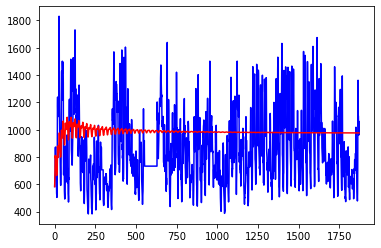




NOx(GT)


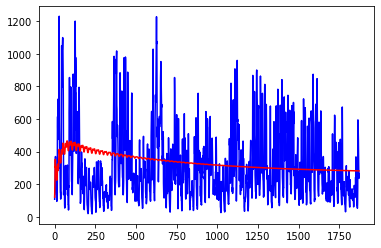




PT08.S3(NOx)


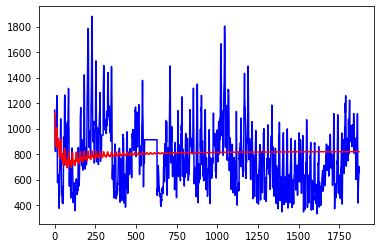




NO2(GT)


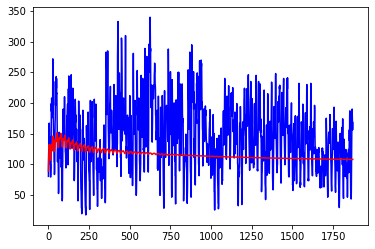




PT08.S4(NO2)


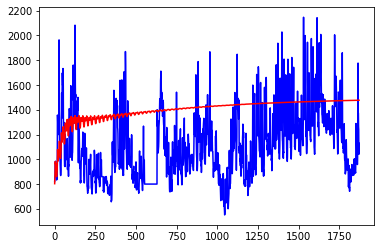




PT08.S5(O3)


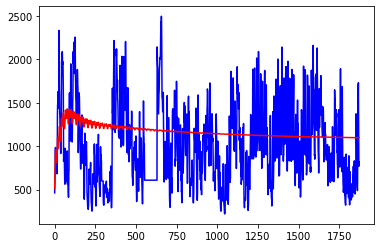




T


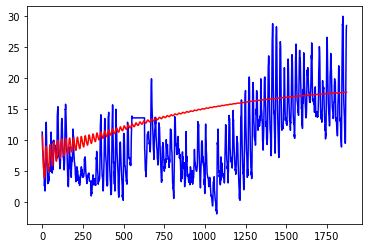




RH


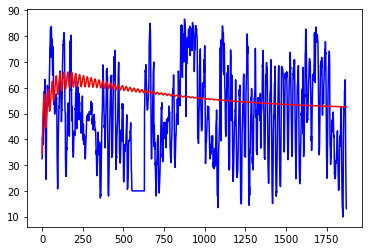




AH


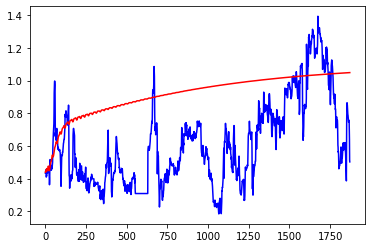

In [88]:
# plotting actual values and predictions
for col in valData.columns:
  print(col)
  plt.figure()
  plt.plot(valDataCopy[col], c = "b")
  plt.plot(forecastData[col], c = "r")
  plt.show()
  print("\n\n")

# Errors in Predictions

In [89]:
# root mean squared error
valData.index = np.arange(0, len(valData))
print("--RMSE--")
for c in valData.columns:
  rmse = np.mean(np.sqrt((valData[c] - forecastData[c]) ** 2))
  print("{}: {}".format(c, rmse))

--RMSE--
CO(GT): 1.2735791245404937
PT08.S1(CO): 185.83173262444822
NMHC(GT): 4.738785208352467
C6H6(GT): 6.421896187345993
PT08.S2(NMHC): 243.17933250332737
NOx(GT): 169.17101577195862
PT08.S3(NOx): 188.63249797593537
NO2(GT): 46.75339963806708
PT08.S4(NO2): 347.8446727444426
PT08.S5(O3): 400.47337726982215
T: 5.216447934803157
RH: 16.200482055336757
AH: 0.335257391948507


In [90]:
# mean absolute percentage error (MAPE)
epsilon = 10 ** -4 # a small constant to prevent division of zero
print("--MAPE--")
for c in valData.columns:
  rmse = np.mean(np.abs((valData[c] - forecastData[c])/ (valData[c] + epsilon)))
  print("{}: {}".format(c, rmse))

--MAPE--
CO(GT): 1.7627401653479549
PT08.S1(CO): 0.1806174936164434
NMHC(GT): 0.017231939946030804
C6H6(GT): 2.575477983523466
PT08.S2(NMHC): 0.3427537564318776
NOx(GT): 1.0648844333948837
PT08.S3(NOx): 0.2714444738317628
NO2(GT): 0.3664799540148437
PT08.S4(NO2): 0.3677812240090611
PT08.S5(O3): 0.5875891258836737
T: 83.73629204502377
RH: 0.4712971113175629
AH: 0.7777738000037847


# Applying VAR to Complete Dataset

In [105]:
# model for the complete dataset
completeVARModel = VAR(endog = df)

In [108]:
completeVARModel = completeVARModel.fit(26)

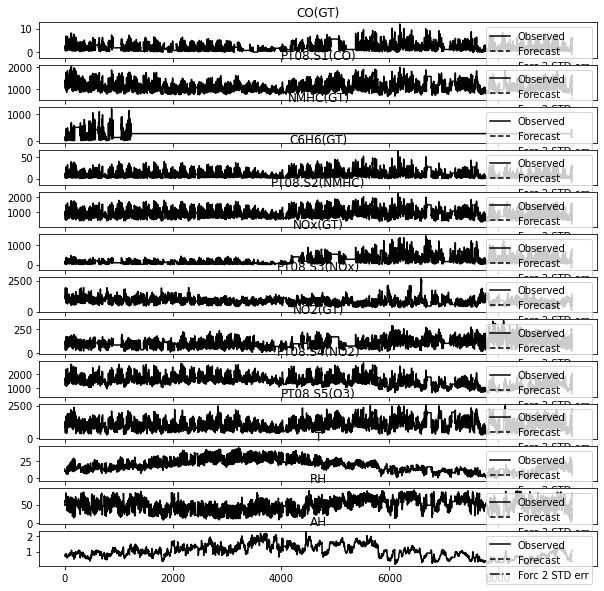

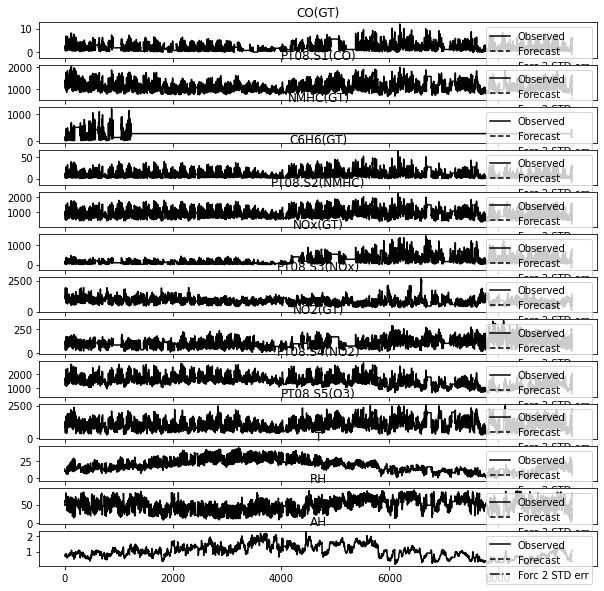

In [111]:
completeVARModel.plot_forecast(20)

In [109]:
forecastsComplete = completeVARModel.forecast(completeVARModel.y, steps = len(df))
print(forecastsComplete.shape)
print(forecastsComplete)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(9357, 13)
[[2.77092385e+00 1.12989153e+03 2.94616599e+02 ... 2.91232708e+01
  1.26227695e+01 5.19441914e-01]
 [2.98274606e+00 1.15213979e+03 2.99518401e+02 ... 2.83375917e+01
  1.43815373e+01 5.32465866e-01]
 [3.54653838e+00 1.21359217e+03 3.00921624e+02 ... 2.62958016e+01
  1.85954400e+01 5.55981391e-01]
 ...
 [2.11467611e+00 1.10271576e+03 2.73200672e+02 ... 1.75541857e+01
  4.96528641e+01 9.98258247e-01]
 [2.11467608e+00 1.10271576e+03 2.73200672e+02 ... 1.75541869e+01
  4.96528635e+01 9.98258299e-01]
 [2.11467606e+00 1.10271575e+03 2.73200672e+02 ... 1.75541881e+01
  4.96528628e+01 9.98258351e-01]]


In [93]:
# dataframe of forecasts
forecastCompData = pd.DataFrame(data = forecastsComplete, columns = df.columns)
forecastCompData

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.345963,1086.332115,280.762173,12.413078,1055.359467,280.882233,659.534851,168.444418,1159.180558,850.845529,27.363901,15.531106,0.515317
1,2.453084,1097.019702,284.860181,12.680804,1057.980688,293.265167,666.191599,168.520527,1180.473980,880.226856,26.305896,17.796623,0.527377
2,2.528818,1104.197767,287.641649,12.776364,1056.514090,302.654521,673.675534,168.229199,1195.287607,904.734692,25.321420,19.910173,0.538879
3,2.579384,1108.743882,289.392031,12.752921,1052.192689,309.532654,681.729036,167.598574,1205.401944,924.982666,24.405527,21.884452,0.549770
4,2.609957,1111.338453,290.344425,12.649151,1045.940017,314.342095,690.130990,166.671502,1212.137217,941.571389,23.553250,23.731001,0.560033
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2.084951,1102.618915,270.669676,10.184317,942.225277,242.670219,831.496118,109.880802,1448.485246,1031.162396,18.224110,48.829686,1.012357
9353,2.084951,1102.618915,270.669676,10.184317,942.225277,242.670219,831.496118,109.880802,1448.485246,1031.162396,18.224110,48.829686,1.012357
9354,2.084951,1102.618915,270.669676,10.184317,942.225277,242.670219,831.496118,109.880802,1448.485246,1031.162396,18.224110,48.829686,1.012357
9355,2.084951,1102.618915,270.669676,10.184317,942.225277,242.670219,831.496118,109.880802,1448.485246,1031.162396,18.224110,48.829686,1.012357
